Matriz de Covariância Reduzida (Quadrada):
 [[ 1.33049908e+01 -4.13488131e-16  2.79207013e-16  5.84859984e-16]
 [-2.62415962e-16  5.70137460e+00 -4.64910495e-16 -6.80221662e-16]
 [ 3.83688249e-16 -3.40017918e-16  2.82291016e+00  9.20044051e-16]
 [ 4.76140486e-16 -5.72593134e-16  8.21970657e-16  1.98412752e+00]]

Autovalores:
[13.30499079  5.7013746   1.98412752  2.82291016]

Autovetores:
[[ 1.00000000e+00  5.43804580e-17 -5.16621365e-17  2.66366022e-17]
 [ 0.00000000e+00  1.00000000e+00  1.40291106e-16  1.54892934e-16]
 [ 0.00000000e+00  2.23173297e-16 -1.17876621e-15 -1.00000000e+00]
 [ 0.00000000e+00 -2.65231121e-16  1.00000000e+00 -4.92409868e-16]]

Dois maiores autovalores:
[13.30499079  5.7013746 ]

Dois maiores autovetores:
[[ 1.00000000e+00  5.43804580e-17]
 [ 0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  2.23173297e-16]
 [ 0.00000000e+00 -2.65231121e-16]]


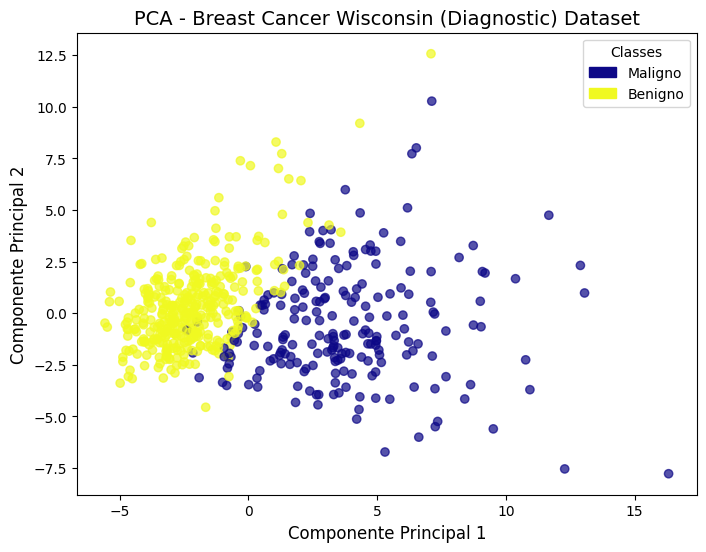

In [142]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

cov_matrix = np.cov(X.T)

n_components = 4
pca = PCA(n_components=n_components)
pca.fit(X)

reduced_cov_matrix = pca.components_ @ cov_matrix @ pca.components_.T

print("Matriz de Covariância Reduzida (Quadrada):\n", reduced_cov_matrix)

# Calculando autovalores e autovetores da matriz de covariância reduzida
eigenvalues_reduced, eigenvectors_reduced = np.linalg.eig(reduced_cov_matrix)

print("\nAutovalores:")
print(eigenvalues_reduced)
print("\nAutovetores:")
print(eigenvectors_reduced)

sorted_indices_reduced = np.argsort(eigenvalues_reduced)[::-1]
eigenvalues_reduced_sorted = eigenvalues_reduced[sorted_indices_reduced]
eigenvectors_reduced_sorted = eigenvectors_reduced[:, sorted_indices_reduced]

top_2_eigenvalues_reduced = eigenvalues_reduced_sorted[:2]
top_2_eigenvectors_reduced = eigenvectors_reduced_sorted[:, :2]

print("\nDois maiores autovalores:")
print(top_2_eigenvalues_reduced)
print("\nDois maiores autovetores:")
print(top_2_eigenvectors_reduced)

X_pca = pca.transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', alpha=0.7)

legend_labels = ['Maligno', 'Benigno']
handles = [Patch(color=scatter.cmap(scatter.norm(i)), label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=handles, title="Classes")

plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.title('PCA - Breast Cancer Wisconsin (Diagnostic) Dataset', fontsize=14)
plt.show()